<a href="https://colab.research.google.com/github/yoshihikom/thu_Details_of_Management_Information_B_Lesson13/blob/main/Details_of_Management_Information_B_Lesson13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# plotlyの最新をインストールする。インストールは以下の公式ホームページに従ってください。
# https://plotly.com/python/getting-started/
pip install plotly==5.22.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 49.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [2]:
# 以下の簡単なデータを棒グラフにする
x = ['1', '2', '3']
y = [50, 20, 30]

In [3]:
# まず、plotly.graph_objectsをインポートします。
import plotly.graph_objects as go
# 次に棒グラフを表示したいのでgo.Barクラスにx、yの値を設定することでインスタンス化します。
data = go.Bar(x=x, y=y)
# あとは、go.Figureに作成した棒グラフデータを渡してやれば表示されます。
go.Figure(data)

In [4]:
#次に散布図を描いてみます。
#Irisデータセットをダウンロードして使います。
#ここでは、setosaとversicolorについてガクの長さを横軸に、幅を縦軸にプロットします。
#では、まずデータを作ります。
from sklearn.datasets import load_iris
iris = load_iris()
x1 = iris['data'][:50, 0]
y1 = iris['data'][:50, 1]
x2 = iris['data'][50: 100, 0]
y2 = iris['data'][50:100, 1]

In [5]:
#そして、図を作成します。
data1 = go.Scatter(x=x1,
                   y=y1,
                   mode='markers',
                   name='setosa'
                   )
data2 = go.Scatter(x=x2,
                   y=y2,
                   mode='markers',
                   name='versicolor')
#xにはx軸のデータをyにはy軸のデータを設定し、modeで点グラフなのか線グラフなのかテキストを表示するのかを設定します。
#そして、setonaとversicolorを違う点にしたいのでdata1とdata2に分け、go.Figureの引数にはこれらをリストにしたものを渡しています。
#すると以下のようなグラフが作成されます。
go.Figure([data1, data2])

In [6]:
#より簡単にグラフを描くためにPlotly ExpressというAPIがあります。
#こちらは、Pandasのデータフレームを簡単に取り扱うことができます。
#まずは、plotly.expressをインポートをします。
import plotly.express as px
#データは、Plotly Expressから提供されているIrisデータを使います。
#これは既にデータフレームの形になっています。
df = px.data.iris()
#あとは、px.scatterで散布図を描くことができます。
#x軸、y軸をそれぞれデータフレーム名で指定し、色を"species”と指定することで、"species"列の値により色を設定できます。
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

**pandas_datareader** は Python のライブラリで、Web上の色々な情報をAPIを使って簡単に取得するライブラリです。

pandas と名前についていますが、別物になっています（昔は一緒に入っていたらしい）
Anaconda でも入っておらず、別途インストールする必要があります。

In [7]:
!pip install pandas-datareader matplotlib

In [31]:
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [32]:
#アメリカの経済指標や金融データの無料サイトFREDから求人件数(JTSJOL)を取得
start = dt.date(2012,1,1)
end = dt.date.today()
df = web.DataReader('JTSJOL', 'fred', start, end)

print(df)

            JTSJOL
DATE              
2012-01-01    3909
2012-02-01    3616
2012-03-01    3979
2012-04-01    3793
2012-05-01    3835
...            ...
2023-12-01    8889
2024-01-01    8748
2024-02-01    8813
2024-03-01    8355
2024-04-01    8059

[148 rows x 1 columns]


In [33]:
#インデックスを列に変換する
df.reset_index(inplace= True)
print(df)

          DATE  JTSJOL
0   2012-01-01    3909
1   2012-02-01    3616
2   2012-03-01    3979
3   2012-04-01    3793
4   2012-05-01    3835
..         ...     ...
143 2023-12-01    8889
144 2024-01-01    8748
145 2024-02-01    8813
146 2024-03-01    8355
147 2024-04-01    8059

[148 rows x 2 columns]


In [35]:
#plotly.graph_objectsのScatterクラスを使って、折れ線グラフを描きます。
data = go.Scatter(x=df['DATE'],
                  y=df['JTSJOL'])
go.Figure(data)


<Axes: >

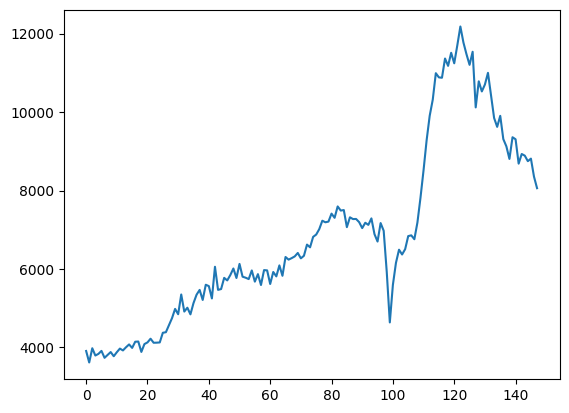

In [37]:
df["JTSJOL"].plot()

In [38]:
#トヨタ自動車の株価を見てみます。
#証券番号は 7203 なので、DataReaderの第一引数に 7203.JP 、第二引数に stooq を渡します。
from pandas_datareader import data

df = data.DataReader('7203.JP', 'stooq')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-27,3300.0,3301.0,3248.0,3263.0,58733800
2024-06-26,3315.0,3317.0,3251.0,3276.0,31440900
2024-06-25,3199.0,3307.0,3168.0,3296.0,44118500
2024-06-24,3123.0,3177.0,3114.0,3150.0,30864600
2024-06-21,3102.0,3136.0,3074.0,3074.0,32553700


In [39]:
#インデックスを列に変換する
df.reset_index(inplace= True)
print(df)

           Date     Open     High      Low    Close    Volume
0    2024-06-27  3300.00  3301.00  3248.00  3263.00  58733800
1    2024-06-26  3315.00  3317.00  3251.00  3276.00  31440900
2    2024-06-25  3199.00  3307.00  3168.00  3296.00  44118500
3    2024-06-24  3123.00  3177.00  3114.00  3150.00  30864600
4    2024-06-21  3102.00  3136.00  3074.00  3074.00  32553700
...         ...      ...      ...      ...      ...       ...
1215 2019-07-05  1335.65  1341.67  1332.55  1336.04  17228675
1216 2019-07-04  1331.00  1335.27  1327.12  1331.97  12432305
1217 2019-07-03  1323.44  1330.61  1318.20  1322.85  19411330
1218 2019-07-02  1330.22  1337.01  1324.60  1335.07  21683695
1219 2019-07-01  1311.99  1333.13  1304.62  1333.13  30141025

[1220 rows x 6 columns]


In [44]:
data = go.Scatter(x=df['Date'],
                  y=df['Open'])
go.Figure(data)

In [45]:
data = []
for col in df.columns:
  if col != 'Date':
    if col != 'Volume':
      data.append(go.Scatter(x=df['Date'],
                y=df[col],
                name=col))
go.Figure(data).show()